# Multi-Resolution Multi-Robot

Experiments for developing the code for this paper.

In [18]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


import numpy as np
from algorithms.mrmd.exploration_package import ExplorationPackage


In [19]:
def visualize_path(pointlist, area=[], facecolor="yellow", use_arrows= False):

    """Visualize a path (specified as a list of waypoints) and a set of control points (which might have been part of the specification)
    :param area """
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.invert_xaxis()
    # plot the generated path
    xlim_min, xlim_max = np.min(pointlist[:,0])-2, np.max(pointlist[:,0])+2
    ylim_min, ylim_max = np.min(pointlist[:,1])-2, np.max(pointlist[:,1])+2
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # if specified, add the area, and extend the plot 
    if len(area) > 0:
        areapath = Path(area)        
        ax.add_patch(patches.PathPatch(areapath, fill=True, facecolor=facecolor))
        xlim_min, xlim_max = np.min(area[:,0])-2, np.max(area[:,0])+2
        ylim_min, ylim_max = np.min(area[:,1])-2, np.max(area[:,1])+2

    #ax.set_xlim(xlim_min, xlim_max)
    #ax.set_ylim(ylim_min, ylim_max)
    # add the trajectory
    if use_arrows == False:
        path = Path(pointlist)
        ax.add_patch(patches.PathPatch(path, fill=False))
    else:
        previous_point = None
        for point in pointlist:
            if previous_point is not None:
                ax.add_patch(patches.Arrow(previous_point[0], previous_point[1], point[0] - previous_point[0], point[1] - previous_point[1]))     
            previous_point = point   
    #plt.show()
    return ax


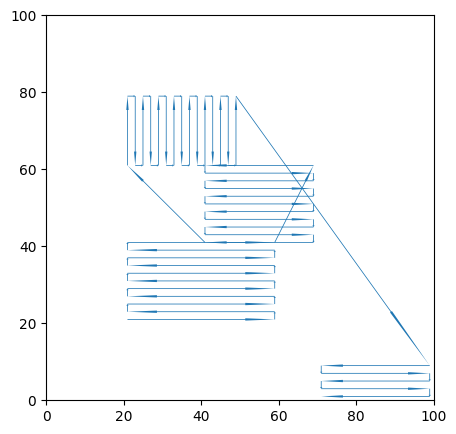

In [20]:
ep1 = ExplorationPackage(20, 60, 20, 40, 2)
path1 = ep1.get_path("top-left")

ep2 = ExplorationPackage(40, 70, 40, 60, 2)
path2 = ep2.get_path("bottom-right")

ep3 = ExplorationPackage(20, 50, 60, 80, 2)
path3 = ep3.get_path("top-right")

ep4 = ExplorationPackage(70, 100, 0, 10, 2)
path4= ep4.get_path("bottom-right")


path = np.concatenate((path1, path2, path3, path4), axis=0)

ax = visualize_path(path, use_arrows=True)
plt.draw()
plt.show()